In de volgende code wordt de differentiaalvergelijking
$$\frac{dy}{dx}=-xy^2$$
benaderd met de methode van Euler. Hierbij wordt aangenomen dat de startconditie $y(0)=2$ is en de stapgrootte is $h=0.01$

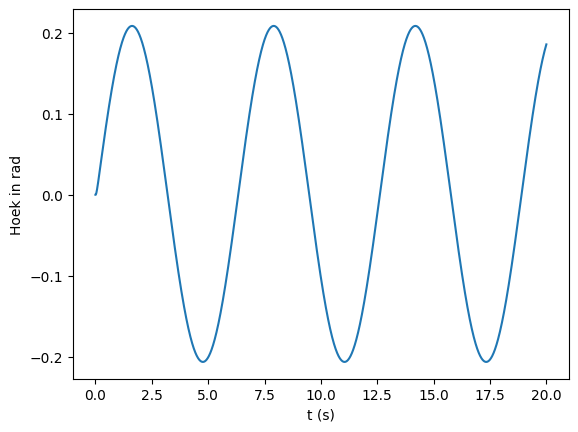

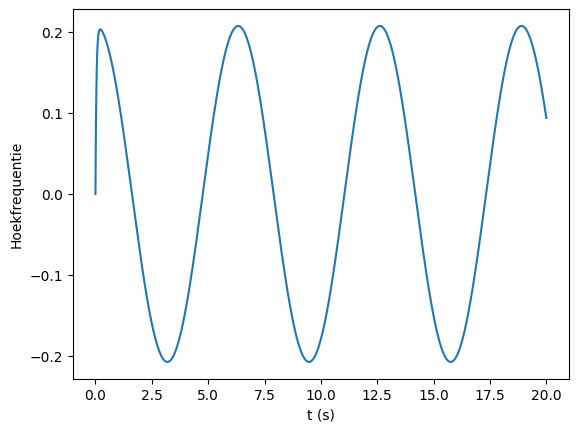

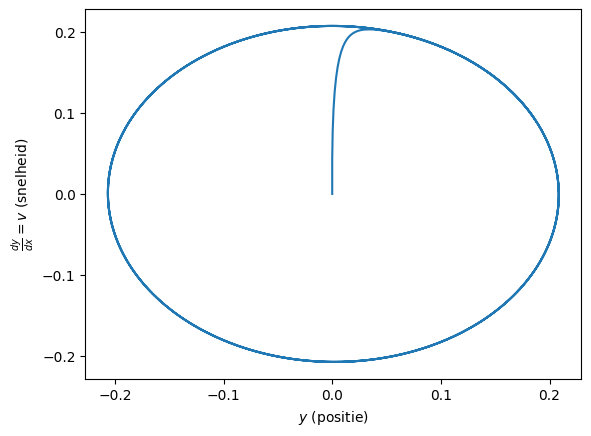

In [24]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.28 
b = 0.1 # Wrijving
r = 12.7 # Motor weerstand
Jm = 5.1*10**-3 # Versimpelde massatraagheid van Balk
omega_coefficient = ((r*b )+ k**2)/(r*Jm) 
T = 20 #Tijd
h = 0.01 #stepsize

N_t = int(round(T/h)) # number of steps
x = np.linspace(0, N_t * h, N_t + 1) # set up array for time
u = np.zeros(N_t + 1)
v = np.zeros(N_t + 1)
# Initiele condities
u[0] = 0 # initiele positie
v[0] = 0 # initiele snelheid



# Step equations forward in time
for n in range(N_t):
    u[n+1] = u[n] + h * v[n]
    v[n+1] = v[n] + h * (-omega_coefficient*v[n]+ 0*u[n]+((k/(r*Jm))*np.cos(h*n)))
    
# Plot grafieken    

plt.plot(x, u)
plt.xlabel('t (s)')
plt.ylabel('Hoek in rad')
plt.title('')
plt.show()

plt.plot(x, v)
plt.xlabel('t (s)')
plt.ylabel(r'Hoekfrequentie')
plt.title('')
plt.show()

plt.plot(u, v)
plt.xlabel(r'$y$ (positie)')
plt.ylabel(r'$\frac{dy}{dx}=v$ (snelheid)')
plt.title('')
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.28 
b = 0.1 # Wrijving
r = 12.7 # Motor weerstand
Jm = 5.1*10**-3 # Versimpelde massatraagheid van Balk
omega_coefficient = ((r*b )+ k**2)/(r*Jm) 
T = 20 #Tijd
h = 0.01 #stepsize

N_t = int(round(T/h)) # number of steps
x = np.linspace(0, N_t * h, N_t + 1) # set up array for time
u = np.zeros(N_t + 1)
v = np.zeros(N_t + 1)
# Initiele condities
u[0] = 0 # initiele positie
v[0] = 0 # initiele snelheid



# Step equations forward in time
for n in range(N_t):
    u[n+1] = u[n] + h * v[n]
    v[n+1] = v[n] + h * (-omega_coefficient*v[n]+ 0*u[n]+((k/(r*Jm))*np.cos(h*n)))
    
# Plot grafieken    

plt.plot(x, u)
plt.xlabel('t (s)')
plt.ylabel('Hoek in rad')
plt.title('')
plt.show()

plt.plot(x, v)
plt.xlabel('t (s)')
plt.ylabel(r'Hoekfrequentie')
plt.title('')
plt.show()

plt.plot(u, v)
plt.xlabel(r'$y$ (positie)')
plt.ylabel(r'$\frac{dy}{dx}=v$ (snelheid)')
plt.title('')
plt.show()


In de volgende code wordt de differentiaalvergelijking

$$\frac{d^2y}{dx^2}+2\frac{dy}{dx}+4y=0$$

benaderd met de methode van Euler. Gezien dit een tweede orde differentiaalvergelijking is, wordt deze opgesplits in twee eerste order differentiaalvergelijkingen

$$\begin{equation}
\begin{split}
\frac{du}{dx} & = v \\
\frac{dv}{dx} & = -2v-4u
\end{split}
\end{equation}$$

waar $u=y$ en $v=\frac{dy}{dx}$. Hierbij wordt aangenomen dat de startcondities $u(0)=3$ en $y(0)=0$ zijn en de stapgrootte is $h=0.01$.

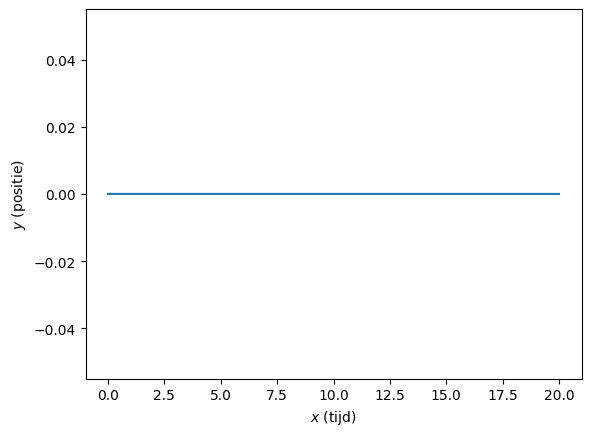

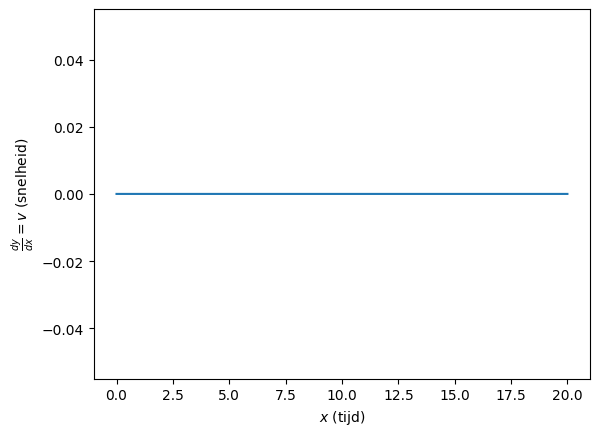

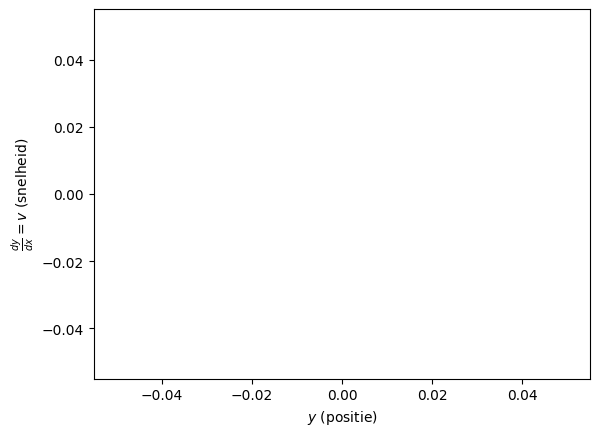

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.01 # stepsize for time step
T = 20 # total time
b = 0.001 # wrijving coefficient 
m = 0.05 # Massa in kg
r = 0.02 # Straal in m
N_t = int(round(T/h)) # number of steps
x = np.linspace(0, N_t * h, N_t + 1) # set up array for time
u = np.zeros(N_t + 1)
v = np.zeros(N_t + 1)
# Initiele condities
u[0] = 0 # initiele positie
v[0] = 0 # initiele snelheid

k = (5 * b) / (7 * m * r**2)


# Step equations forward in time
for n in range(N_t):
    u[n+1] = u[n] + h * v[n]
    v[n+1] = v[n] - h * k * v[n]
    
# Plot grafieken    

plt.plot(x, u)
plt.xlabel('$x$ (tijd)')
plt.ylabel('$y$ (positie)')
plt.title('')
plt.show()

plt.plot(x, v)
plt.xlabel('$x$ (tijd)')
plt.ylabel(r'$\frac{dy}{dx}=v$ (snelheid)')
plt.title('')
plt.show()

plt.plot(u, v)
plt.xlabel(r'$y$ (positie)')
plt.ylabel(r'$\frac{dy}{dx}=v$ (snelheid)')
plt.title('')
plt.show()

Nu voegen we een 'forcing function' toe in de vorm van een sinusoïde en gaan we de differentiaalvergelijking

$$\frac{d^2y}{dx^2}+2\frac{dy}{dx}+4y=5\cos(10x)$$

benaderen met de methode van Euler. Gezien dit een tweede orde differentiaalvergelijking is, wordt deze opgesplits in twee eerste order differentiaalvergelijkingen

$$\begin{equation}
\begin{split}
\frac{du}{dx} & = v \\
\frac{dv}{dx} & = -2v-4u+5\cos(10x)
\end{split}
\end{equation}$$

waar $u=y$ en $v=\frac{dy}{dx}$. Hierbij wordt weer aangenomen dat de startcondities $u(0)=3$ en $y(0)=0$ zijn en de stapgrootte is $h=0.01$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.01 # stepsize for time step
T = 20 # total time
N_t = int(round(T/dt)) # number of steps
x = np.linspace(0, N_t * dt, N_t + 1) # set up array for time
u = np.zeros(N_t + 1)
v = np.zeros(N_t + 1)
# Initiele condities
u[0] = 3 # initiele positie
v[0] = 0 # initiele snelheid


# Step equations forward in time
for n in range(N_t):
    u[n+1] = u[n] + h * v[n]
    v[n+1] = v[n] + h * (-2*v[n] - 4*u[n]+5*np.cos(10*dt*n))
    
# Plot grafieken    

plt.plot(x, u)
plt.xlabel('$x$ (tijd)')
plt.ylabel('$y$ (positie)')
plt.title('')
plt.show()

plt.plot(x, v)
plt.xlabel('$x$ (tijd)')
plt.ylabel(r'$\frac{dy}{dx}=v$ (snelheid)')
plt.title('')
plt.show()

plt.plot(u, v)
plt.xlabel(r'$y$ (positie)')
plt.ylabel(r'$\frac{dy}{dx}=v$ (snelheid)')
plt.title('')
plt.show()

NameError: name 'dt' is not defined